# BHARAT INTERN

## Sonali Mahamuni

### Task1-  Stock Prediction

In [22]:
#Import the Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [23]:
# Load the data from csv form
df=pd.read_csv("Amazon.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,15-05-1997,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,16-05-1997,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,19-05-1997,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,20-05-1997,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,21-05-1997,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
6150,21-10-2021,3414.250000,3440.280029,3403.000000,3435.010010,3435.010010,1881400
6151,22-10-2021,3421.000000,3429.840088,3331.300049,3335.550049,3335.550049,3133800
6152,25-10-2021,3335.000000,3347.800049,3297.699951,3320.370117,3320.370117,2226000
6153,26-10-2021,3349.510010,3416.120117,3343.979980,3376.070068,3376.070068,2693700


In [24]:
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].astype(str)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
6150,2021-10-21,3414.250000,3440.280029,3403.000000,3435.010010,3435.010010,1881400
6151,2021-10-22,3421.000000,3429.840088,3331.300049,3335.550049,3335.550049,3133800
6152,2021-10-25,3335.000000,3347.800049,3297.699951,3320.370117,3320.370117,2226000
6153,2021-10-26,3349.510010,3416.120117,3343.979980,3376.070068,3376.070068,2693700


In [25]:
trainset=df.iloc[-1000:-100,1:2].values #Open
#testset=df.iloc[-100:,1:2].values #Open
real_stock_price = trainset.copy()

In [26]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
print(training_scaled[0:5])
print(len(training_scaled))

[[7.92038527e-04]
 [0.00000000e+00]
 [1.29528951e-03]
 [1.35304719e-03]
 [7.42741859e-05]]
900


In [27]:
x_train = []
y_train = []

In [28]:
for i in range(60,len(training_scaled)):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train.shape,y_train.shape)

(840, 60) (840,)


In [29]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print('(samples, time steps, features) =',x_train.shape)

(samples, time steps, features) = (840, 60, 1)


In [30]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [31]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
regressor.fit(x_train,y_train,epochs =100, batch_size = 32)

Epoch 1/100
27/27 [==============================] - 12s 102ms/step - loss: 0.0619
Epoch 2/100
27/27 [==============================] - 3s 105ms/step - loss: 0.0087
Epoch 3/100
27/27 [==============================] - 3s 107ms/step - loss: 0.0067
Epoch 4/100
27/27 [==============================] - 3s 108ms/step - loss: 0.0065
Epoch 5/100
27/27 [==============================] - 3s 104ms/step - loss: 0.0063
Epoch 6/100
27/27 [==============================] - 3s 102ms/step - loss: 0.0066
Epoch 7/100
27/27 [==============================] - 3s 115ms/step - loss: 0.0052
Epoch 8/100
27/27 [==============================] - 3s 113ms/step - loss: 0.0051
Epoch 9/100
27/27 [==============================] - 3s 106ms/step - loss: 0.0047
Epoch 10/100
27/27 [==============================] - 3s 105ms/step - loss: 0.0048
Epoch 11/100
27/27 [==============================] - 3s 104ms/step - loss: 0.0052
Epoch 12/100
27/27 [==============================] - 3s 108ms/step - loss: 0.0047
Epoch 13/100

In [32]:
testset=df.iloc[-100:,1:2].values #Open

In [33]:
inputs = df.iloc[len(trainset)-len(testset)-60:,1].values
print(inputs.shape)
print(inputs[0:10])

(5415,)
[53.375  49.375  51.8125 53.3125 49.3125 54.     56.     59.1875 55.25
 54.25  ]


In [34]:
inputs = inputs.reshape(-1,1)
print(inputs.shape)

#sc = MinMaxScaler(feature_range = (0,1))
inputs = sc.transform(inputs)
print(inputs.shape)


(5415, 1)
(5415, 1)


In [35]:
x_test = []
for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
print(x_test.shape)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(5355, 60)
(5355, 60, 1)


In [36]:
predicted_price = regressor.predict(x_test)

168/168 [==============================] - 9s 39ms/step


In [37]:
predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price.shape)

(5355, 1)


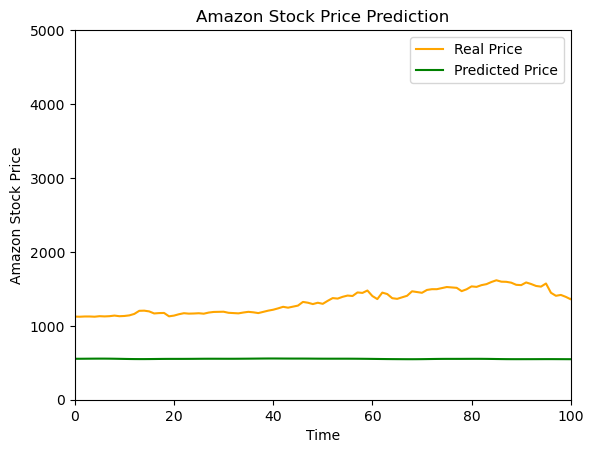

In [38]:
plt.plot(real_stock_price,color = 'orange', label = 'Real Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.xlim(0,100)  
plt.ylim(0,5000) 
plt.legend()
plt.show()

In [39]:
inputs = np.array(trainset[-60:])
new_predicted_price=[]
for i in range(100):
    x = np.reshape(inputs, (1,60,1))
    pred = regressor.predict(x)
    inputs = np.append(inputs, pred)
    inputs = inputs[1:]
    new_predicted_price+=[pred.reshape(-1)]


1/1 [==============================] - 0s 46ms/step


In [40]:
new_predicted_price = sc.inverse_transform(np.array(new_predicted_price))
print(new_predicted_price.shape)

(100, 1)


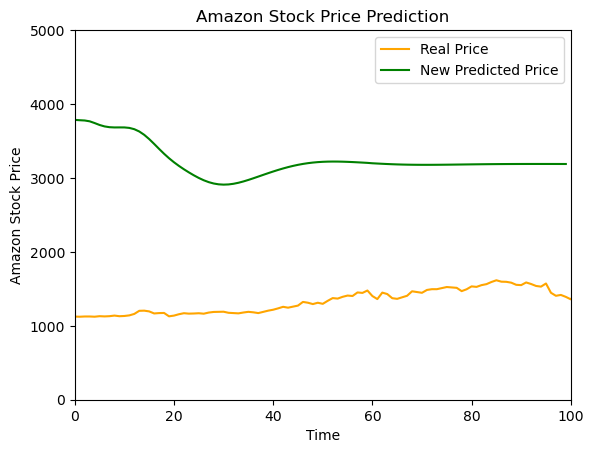

In [41]:
plt.plot(real_stock_price,color = 'orange', label = 'Real Price')
plt.plot(new_predicted_price, color = 'green', label = 'New Predicted Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.xlim(0,100)  
plt.ylim(0,5000) 
plt.legend()
plt.show()